## 1.資料預處理

In [6]:
from keras.datasets import mnist
from keras import utils as np_utils

In [2]:
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 將特徵轉換為4維向量(60000, 28, 28, 1), 並轉成浮點數
train_feature_vector = train_feature.reshape(len(train_feature), 28, 28, 1).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature), 28, 28, 1).astype('float32')

In [4]:
# 將特徵標準化，提高準確率
train_feature_normalize = train_feature_vector / 255
test_feature_normalize = test_feature_vector / 255

In [7]:
# 將標籤進行One-Hot Encoding
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)

## 2.建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(filters = 10, kernel_size = (3, 3), padding = "same", input_shape = (28, 28, 1), activation = "relu"))

In [11]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
model.add(Conv2D(filters = 20, kernel_size = (3, 3), padding = "same", activation = "relu"))

In [13]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
model.add(Dropout(0.2))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units = 256, activation = "relu"))

In [17]:
model.add(Dense(units = 10, activation = "softmax"))

## 3.訓練模型

In [18]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [19]:
train_history = model.fit(x = train_feature_normalize, y = train_label_onehot, validation_split = 0.2, epochs = 10, batch_size = 200, verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 24s - loss: 0.3742 - accuracy: 0.8913 - val_loss: 0.1211 - val_accuracy: 0.9621
Epoch 2/10
 - 25s - loss: 0.1170 - accuracy: 0.9637 - val_loss: 0.0762 - val_accuracy: 0.9775
Epoch 3/10
 - 24s - loss: 0.0842 - accuracy: 0.9739 - val_loss: 0.0618 - val_accuracy: 0.9825
Epoch 4/10
 - 24s - loss: 0.0663 - accuracy: 0.9791 - val_loss: 0.0555 - val_accuracy: 0.9833
Epoch 5/10
 - 24s - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0511 - val_accuracy: 0.9848
Epoch 6/10
 - 24s - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 7/10
 - 24s - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 8/10
 - 24s - loss: 0.0357 - accuracy: 0.9880 - val_loss: 0.0421 - val_accuracy: 0.9874
Epoch 9/10
 - 24s - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 10/10
 - 24s - loss: 0.0283 - accuracy: 0.9907 - val_loss: 0.0400 - val_accuracy: 0.9882


## 4.評估準確度

In [21]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print("準確率 =", scores[1])

10000/10000 [==============================] - 2s 241us/step
準確率 = 0.9894000291824341


## 5.進行預測

In [22]:
prediction = model.predict_classes(test_feature_normalize)

In [23]:
import matplotlib.pyplot as plt
def show_images_labels_predictions(images,labels, predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[i])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') 
            title += '\nlabel = ' + str(labels[i])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[i])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

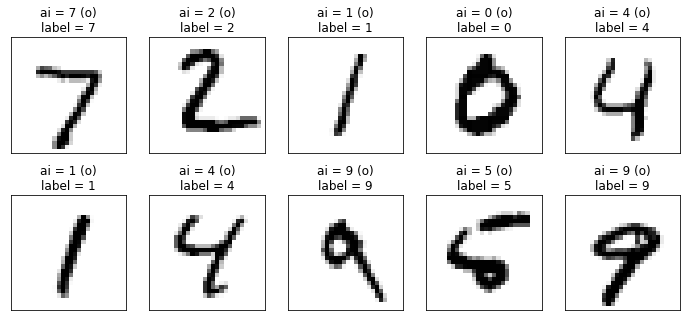

In [24]:
show_images_labels_predictions(test_feature, test_label, prediction, 0)